<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.files import upload

In [ ]:
upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"himanshuarora17","key":"a0ff11803f5e2f6b34c2901cbe6fcf45"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mrmorj/hate-speech-and-offensive-language-dataset

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 145MB/s]


In [ ]:
! unzip /content/hate-speech-and-offensive-language-dataset.zip

Archive:  /content/hate-speech-and-offensive-language-dataset.zip
  inflating: labeled_data.csv        


In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/labeled_data.csv')

df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
# check for missing values in the data

df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

- There are no missing values in the data

In [ ]:
# check for duplicates in the data

df.duplicated(subset='tweet').sum()

0

There are no duplicate values in the data

In [ ]:
# filter out the text and the target column

X = df[['tweet']].copy()
y = df['class'].copy()

In [ ]:
# different classes in the data

y.value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

- The distribution of classes is highly imbalanced

In [ ]:
# number of tweets

X.shape

(24783, 1)

In [ ]:
X.iloc[70,0]

'"@ArizonasFinest6: Why the eggplant emoji doe?"y he say she looked like scream lmao'

In [ ]:
# clean the tweets text data

# remove all retweet tags from the data

X['tweet'] = X['tweet'].str.replace('RT','')

In [ ]:
X.iloc[6351,0]

"@katelyn_lomax I'm not a nig. &#128548;"

In [ ]:
# remove the twitter tags

import re

tag_pat = re.compile('@\w+')

def remove_tags(text):
    text = tag_pat.sub('',text)
    return text

X['tweet'] = X['tweet'].apply(remove_tags)

In [ ]:
# remove numbers

num_pat = re.compile('[0-9]')

def remove_digits(text):
    text = num_pat.sub('',text)
    return text

X['tweet'] = X['tweet'].apply(remove_digits)

In [ ]:
# remove punctuations

from string import punctuation
punc = punctuation

def remove_punc(text):
    for p in punc:
        text = text.replace(p,'')
    return text

X['tweet'] = X['tweet'].apply(remove_punc)

In [ ]:
# remove whitespaces from the tweets

X['tweet'] = X['tweet'].str.lstrip()
X['tweet'] = X['tweet'].str.rstrip()

In [ ]:
X['tweet'].sample(30)

22225     Tom Brady is the biggest pussy in the NFL by far
23751    dem niggas ca have them white hoes I love my b...
15915    I dont understand if all these hoes say they g...
1695     gotta buy those antislip shoes so these hoes w...
16008    Nigga wanna bitch about a party yall know my a...
14310    At George Steinbrenners first Yankees news con...
5767     that was for other bitches lol you cute tho wa...
24045    if ice jj fish gets all these looks  who reall...
24106    its been ten mins bitch I gave you a  min assi...
20131                        Ya lil dumb ass bitch ian fwy
10518    I hate when ppl come to my house and make a me...
5456     I knowww righttt I dont even know how to use t...
14286                 r u african because ur african bitch
5292                     skate  trash  skate  had goat DLC
2964     no I wuz just making a general statement Ive n...
10497    I hate when bitches think you expect something...
18303    I have no hoes man I dont need those though  I.

In [ ]:
# remove urls

url_pat = re.compile('http\w+')

def remove_url(text):
    text = url_pat.sub('',text)
    return text

X['tweet'] = X['tweet'].apply(remove_url)

In [ ]:
X['tweet'].sample(30)

1465     In the fashion world urban means stolen from b...
9470     Going out with bad intension Keep yo girlfrien...
21159    Still cant see what niggers see in them white ...
14655    Frfr come party wimmie Im leavin this shithole...
19361                               anxiety is such a cunt
15017     Wow\n Such banana\n So potassium \n Much yellow 
24678    when yo song come on and you hit the blunt har...
14114             when an ugly bitch tells me to text her 
5031     I didnt make to any games last season Just loo...
11609                If yo pussy good my Pullout game weak
2904     The same guy who thinks he can slang around bi...
20937    So Sterling bitch gotta he a hoe aye she paid ...
17015    Friends a Proud Hindu n ShivSainik brother shr...
19076    wtf this bitch broke her arm eery time she hit...
22511    We cant call somebody wack we got Raymond Felt...
19220    If I got time to hold my phone the whole time ...
597      YAH has said in his word that the Mtzraymegypt.

In [ ]:
# remove whitespaces from the tweets

X['tweet'] = X['tweet'].str.lstrip()
X['tweet'] = X['tweet'].str.rstrip()

In [ ]:
X['tweet'][24498]

'that is what I do     The nicer you are the easier youre hurt So just be a bitch'

In [ ]:
# remove whitespace inside the tweets

space_pat = re.compile(' {2,}')

def remove_whitespace(text):
    text = space_pat.sub(' ',text)
    return text

X['tweet'] = X['tweet'].apply(remove_whitespace)

In [ ]:
X['tweet'][24498]

'that is what I do The nicer you are the easier youre hurt So just be a bitch'

In [ ]:
print(X['tweet'][24647])

we dem birds


In [ ]:
#remove newline

n_tag = re.compile('\\n')

def remove_newline(text):
    text = n_tag.sub(' ',text)
    return text

X['tweet'] = X['tweet'].apply(remove_newline)

In [ ]:
X['tweet'][14637]

'Lightup Sketchers  Definition kick your feet together and watch the bitches flock  Sentence blinding bitches when yo'

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense,Flatten
import tensorflow_hub as hub

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.4 MB/s eta 0:00:00


In [ ]:
y_train.unique()

array([1, 2, 0])

In [ ]:
# url of the models

encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
# create model and preprocessor

# bert_model = hub.KerasLayer(encoder_url)
# preprocessor = hub.KerasLayer(preprocess_url)

In [ ]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=5)

In [ ]:
from keras.models import Functional,Model
# create the sequential model

input_layer = keras.layers.Input(shape=(), dtype=tf.string, name='text')
bert_preprocessor = hub.KerasLayer(handle=preprocess_url)
preprocess_output = bert_preprocessor(input_layer)
bert_model = hub.KerasLayer(handle=encoder_url)
bert_results = bert_model(preprocess_output)['pooled_output']

dense_1 = Dense(units=128,activation='relu')(bert_results)
dense_2 = Dense(units=64,activation='relu')(dense_1)
output_layer = Dense(units=3,activation='softmax')(dense_2)

model = Model(inputs=input_layer,outputs=output_layer)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

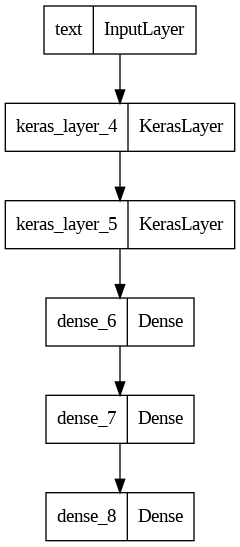

In [ ]:
# plot the bert model

from keras.utils import plot_model

plot_model(model=model)

In [ ]:
X_train.shape[0] - (X_train.shape[0]*0.2)

15860.8

In [ ]:
epochs=10

history = model.fit(tf.constant(X_train),y_train,validation_split=0.2,epochs=epochs,batch_size=100)

Epoch 1/10
159/159 [==============================] - 286s 2s/step - loss: 0.5988 - accuracy: 0.7849 - val_loss: 0.5134 - val_accuracy: 0.8250
Epoch 2/10
159/159 [==============================] - 276s 2s/step - loss: 0.5097 - accuracy: 0.8124 - val_loss: 0.4719 - val_accuracy: 0.8323
Epoch 3/10
159/159 [==============================] - 277s 2s/step - loss: 0.5009 - accuracy: 0.8151 - val_loss: 0.4539 - val_accuracy: 0.8417
Epoch 4/10
159/159 [==============================] - 277s 2s/step - loss: 0.4927 - accuracy: 0.8170 - val_loss: 0.4672 - val_accuracy: 0.8364
Epoch 5/10
159/159 [==============================] - 276s 2s/step - loss: 0.4770 - accuracy: 0.8255 - val_loss: 0.4574 - val_accuracy: 0.8280
Epoch 6/10
159/159 [==============================] - 243s 2s/step - loss: 0.4699 - accuracy: 0.8283 - val_loss: 0.4374 - val_accuracy: 0.8361
Epoch 7/10
159/159 [==============================] - 242s 2s/step - loss: 0.4590 - accuracy: 0.8344 - val_loss: 0.4325 - val_accuracy: 0.8452